# 🧠 Deep Neural Network from Scratch for Cat vs Dog Classification

This project demonstrates a full implementation of a feedforward neural network **from scratch** using only `NumPy` and `PIL`, without any deep learning frameworks like TensorFlow or PyTorch.

The model is trained to classify images of **cats vs dogs** from a dataset of labeled images. The process includes:

- Loading and preprocessing image data  
- Designing and initializing a l-layer neural network 
- Implementing forward and backward propagation  
- Training with gradient descent  
- Evaluating performance and visualizing the learning curve  
- Predicting custom images from a manual test set

> This notebook serves as an educational example to deepen understanding of neural networks by building one manually, step-by-step.
---
### 📦 Cell #1: Importing Required Libraries

This cell imports the essential Python libraries needed for building, visualizing, and managing the neural network workflow. Each library serves a specific purpose:

- `numpy`: Fundamental package for numerical operations and array handling.
- `matplotlib.pyplot` & `seaborn`: Used for plotting and visualizing data and training results.
- `copy`: Provides functionality for creating deep or shallow copies of objects.
- `os`: Facilitates interaction with the operating system, such as file and directory handling.
- `PIL.Image`: From the Pillow library, used for opening, manipulating, and processing image files.

These libraries will support data preprocessing, model implementation, visualization, and general utility operations.


In [78]:
import numpy as np # Import NumPy for numerical operations and array management
import matplotlib.pyplot as plt # Import Matplotlib's pyplot module for plotting and visualization
import copy # Import copy to enable object copying (deep and shallow)
import os # Import os for interacting with the operating system (e.g., file paths)
from PIL import Image # Import Image class from Pillow (PIL) for image processing tasks
import time
import pickle
import seaborn as sns # Import seaborn for enhanced statistical plotting
import warnings


---
### 📁 Cell #2: Set Paths to Image Directories

This cell defines the paths to the image datasets for training and testing.  
Make sure to update these paths based on the actual location where you extracted your dataset locally.

- `train_data_dir`: Path to the training dataset containing labeled images of cats and dogs.
- `test_data_dir`: Path to the test dataset used for evaluating model performance on unseen data.

In [49]:
# ================================
# 📁 Set Paths to Image Directories
# ================================

# Path to the training dataset (contains subfolders for each class)
train_data_dir = './dataset/training_set'  # ⚠️ Update this if your dataset is in a different location

# Path to the testing dataset (used for evaluating model performance)
test_data_dir = './dataset/test_set'       # ⚠️ Update this accordingly as well

---
### 🖼️ Cell #3: Load and Preprocess Image Data

This function loads and preprocesses the training and test images from their respective directories.

Key steps involved:
- Images are resized to **64×64** and converted to **RGB**.
- Labels are assigned as: `1` for **cat**, `0` for **dog**.
- Images are flattened and stacked horizontally to create a single dataset.
- Pixel values are **normalized** to range `[0, 1]`.

The function returns:
- `X_combined`: Flattened, normalized image data (`features`)
- `y_combined`: Corresponding labels
- `X_train`: Original (non-flattened) training images for visualization or manual testing

In [50]:
def load_combined_data(train_dir, test_dir):
    """
    Load, preprocess, and combine training and test image data.
    
    Args:
        train_dir (str): Path to training dataset directory.
        test_dir (str): Path to test dataset directory.

    Returns:
        X_combined (ndarray): Flattened and normalized feature data.
        y_combined (ndarray): Labels corresponding to the combined data.
        X_train (ndarray): Original training images (non-flattened).
    """

    def images_with_labels(data_dir):
        images = []
        labels = []

        # Iterate through subdirectories (e.g., 'cat', 'dog')
        for sub_folder in os.listdir(data_dir):
            # Assign label: 1 for 'cat', 0 for anything else
            label = 1 if sub_folder.lower() == 'cat' else 0
            sub_folder_path = os.path.join(data_dir, sub_folder)

            # Iterate through each image file in the subdirectory
            for file_name in os.listdir(sub_folder_path):
                img_path = os.path.join(sub_folder_path, file_name)
                try:
                    # Open image, resize to 64x64, convert to RGB
                    img = Image.open(img_path).resize((64, 64)).convert('RGB')
                    images.append(img)
                    labels.append(label)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

        return np.array(images), np.array(labels)

    # Load training and test images with labels
    X_train, y_train = images_with_labels(train_dir)
    X_test, y_test = images_with_labels(test_dir)

    # Flatten image data: shape becomes (num_pixels, num_samples)
    X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
    X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

    # Reshape labels: shape becomes (1, num_samples)
    y_train = y_train.reshape(1, -1)
    y_test = y_test.reshape(1, -1)

    # Combine training and test sets
    X_combined = np.hstack((X_train_flatten, X_test_flatten))
    y_combined = np.hstack((y_train, y_test))

    # Normalize pixel values to [0, 1]
    X_combined = X_combined / 255.0

    return X_combined, y_combined, X_train  # X_train (non-flattened) is kept for visualization/testing

---
### 🧹 Cell #4: Load and Preprocess the Dataset

This cell executes the data loading function to fetch the training and test data.

Returned outputs:
- `X`: Combined, flattened, and normalized pixel data from all images.
- `Y`: Corresponding binary labels (`1` for cat, `0` for dog).
- `X_Orig`: Original, unflattened training images (PIL format) used for visualization or manual prediction.

In [51]:
# Load and preprocess the dataset
# X: Combined and normalized image data (flattened shape: num_pixels × num_samples)
# Y: Corresponding labels (1 for cat, 0 for dog)
# X_Orig: Original PIL images from the training set (for visual inspection or custom testing)
X, Y, X_Orig = load_combined_data(train_data_dir, test_data_dir)

---
### 🖼️ Cell #5: Visualize an Example from the Dataset

This cell allows you to visualize a specific image from the dataset and view its corresponding label.

- `index`: Choose any index within the range of available images.
- The image will be displayed using `matplotlib`.
- The label is printed — where `1` represents a **cat**, and `0` represents a **dog**.

Label: 1


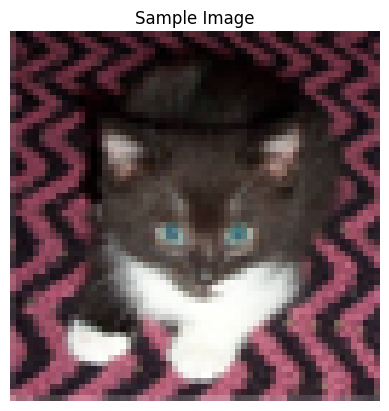

In [52]:
# ========================================
# 🖼️ Visualize an Example from the Dataset
# ========================================

# Set the index of the example to view
index = 400  # Change this value to view different samples

# Display the original image from the dataset
plt.imshow(X_Orig[index])
plt.axis('off')  # Hide axis ticks for a cleaner view
plt.title("Sample Image")

# Print the corresponding label: 1 for cat, 0 for dog
label = np.squeeze(Y[:, index])  # Remove extra dimensions for readability
print("Label:", label)

---
### 📐 Cell #6: Inspect Dataset Shapes

This cell checks the shapes of the feature matrix `X` and the label vector `Y` to confirm the dataset structure.

Key outputs:
- `X.shape`: Should be `(num_pixels, num_samples)`
- `Y.shape`: Should be `(1, num_samples)`
- `m`: Total number of training examples

In [53]:
# =====================================
# 📐 Inspect Feature and Label Shapes
# =====================================

# Get the shapes of the feature and label arrays
shape_X = X.shape  # Expected shape: (num_pixels, num_samples)
shape_Y = Y.shape  # Expected shape: (1, num_samples)

# Calculate number of training examples (i.e., number of columns in X)
m = shape_X[1]

# Print the dataset dimensions and number of samples
print('The shape of X is: ' + str(shape_X))
print('The shape of Y is: ' + str(shape_Y))
print('I have m = %d training examples!' % (m))

The shape of X is: (12288, 1200)
The shape of Y is: (1, 1200)
I have m = 1200 training examples!


---
### 🧮 Cell #7: Initialize Network Parameters

This function initializes the weights and biases for a deep neural network with a customizable architecture and initialization strategy.

#### Arguments:
- `layers_dims`: List containing the number of units in each layer (including input and output layers).
- `method`: Initialization strategy for weights:
  - `'relu'`: He initialization (recommended for ReLU activations)
  - `'tanh'`: Xavier initialization (for tanh activations)

#### Returns:
- `parameters`: A dictionary containing initialized weights `W1, W2, ..., WL` and biases `b1, b2, ..., bL`.

In [54]:
def initialize_parameters_deep(layers_dims, method='relu'):
    """
    Initialize weights and biases for a deep neural network.

    Args:
        layers_dims (list): Number of units in each layer (including input and output).
        method (str): Initialization method — 'relu' (He) or 'tanh' (Xavier).

    Returns:
        parameters (dict): Dictionary containing W1...WL and b1...bL
    """
    np.random.seed(3)  # For reproducibility
    parameters = {}
    L = len(layers_dims)  # Total number of layers including input and output

    for layer in range(1, L):
        if method == 'relu':
            # He initialization for ReLU
            parameters['W' + str(layer)] = np.random.randn(
                layers_dims[layer], layers_dims[layer - 1]
            ) * np.sqrt(2 / layers_dims[layer - 1])
        elif method == 'tanh':
            # Xavier initialization for tanh
            parameters['W' + str(layer)] = np.random.randn(
                layers_dims[layer], layers_dims[layer - 1]
            ) * np.sqrt(1 / layers_dims[layer - 1])
        else:
            raise ValueError("Unsupported activation method for initialization.")

        # Initialize biases to zero
        parameters['b' + str(layer)] = np.zeros((layers_dims[layer], 1))

    return parameters

---
### ➕ Cell #8: Linear Combination Step (Forward Propagation)

This function performs the linear part of the forward propagation step for a single layer.

#### Formula:
\[
Z = W \cdot A + b
\]

#### Arguments:
- `A`: Activations from the previous layer (or input features).
- `W`: Weight matrix for the current layer.
- `B`: Bias vector for the current layer.

#### Returns:
- `Z`: Linear output (pre-activation).
- `cache`: Tuple `(A, W, B)` used later for backpropagation.

In [55]:
def linear_combination(A, W, B):
    """
    Compute the linear part of forward propagation for one layer.

    Args:
        A (ndarray): Activations from the previous layer (or input data).
        W (ndarray): Weights matrix of the current layer.
        B (ndarray): Bias vector of the current layer.

    Returns:
        Z (ndarray): Linear output (pre-activation).
        cache (tuple): Tuple of values (A, W, B) to use during backpropagation.
    """
    Z = np.dot(W, A) + B  # Linear combination: Z = WA + b
    cache = (A, W, B)     # Store values for backward pass
    return Z, cache

---
### 🔌 Cell #9: Activation Functions

This cell defines the most commonly used activation functions for neural networks:

- **Sigmoid**: Used in binary classification output layers  
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]

- **ReLU (Rectified Linear Unit)**: Used in hidden layers for non-linearity  
  \[
  \text{ReLU}(z) = \max(0, z)
  \]

- **Tanh (Hyperbolic Tangent)**: Symmetric alternative to sigmoid  
  \[
  \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
  \]

Each function returns:
- `s`: Activated output
- `z`: Cached linear input for use during backpropagation

In [56]:
def sigmoid(z):
    """
    Compute the sigmoid activation.

    Args:
        z (ndarray): Linear input to the neuron.

    Returns:
        s (ndarray): Activated output using sigmoid.
        z (ndarray): Cached input for use in backpropagation.
    """
    s = 1 / (1 + np.exp(-z))  # Sigmoid activation formula
    return s, z


def relu(z):
    """
    Compute the ReLU activation.

    Args:
        z (ndarray): Linear input to the neuron.

    Returns:
        s (ndarray): Activated output using ReLU.
        z (ndarray): Cached input for use in backpropagation.
    """
    s = np.maximum(0, z)  # ReLU replaces negative values with 0
    return s, z


def tanh(z):
    """
    Compute the tanh activation.

    Args:
        z (ndarray): Linear input to the neuron.

    Returns:
        s (ndarray): Activated output using tanh.
        z (ndarray): Cached input for use in backpropagation.
    """
    s = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))  # Tanh formula
    return s, z

---
### 🔄 Cell #10: Forward Propagation with Activation

This function performs **one full forward step** through a single neural network layer, including:

1. Linear computation:  
   \[
   Z = W \cdot A_{\text{prev}} + b
   \]
2. Activation (ReLU, Sigmoid, or Tanh):  
   \[
   A = \text{activation}(Z)
   \]

#### Arguments:
- `A_prev`: Activations from the previous layer (or input features)
- `W`: Weights for the current layer
- `b`: Biases for the current layer
- `activation`: Activation function to apply (`'relu'`, `'sigmoid'`, or `'tanh'`)

#### Returns:
- `A`: Activated output for the current layer
- `cache`: Tuple storing both linear and activation caches for backpropagation

In [57]:
def activation_forward(A_prev, W, b, activation):
    """
    Perform forward propagation for one layer (linear + activation).

    Args:
        A_prev (ndarray): Activations from the previous layer.
        W (ndarray): Weights for the current layer.
        b (ndarray): Biases for the current layer.
        activation (str): Activation function to apply: 'relu', 'sigmoid', or 'tanh'.

    Returns:
        A (ndarray): Activated output for the current layer.
        cache (tuple): (linear_cache, activation_cache) needed for backprop.
    """
    # Step 1: Linear combination
    Z, linear_cache = linear_combination(A_prev, W, b)

    # Step 2: Apply chosen activation function
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)
    elif activation == "tanh":
        A, activation_cache = tanh(Z)
    else:
        raise ValueError("Unsupported activation")

    # Store caches for backward pass
    cache = (linear_cache, activation_cache)

    return A, cache

---
### 🔁 Cell #11: Full Model Forward Propagation

This function performs forward propagation through the **entire L-layer neural network**.

#### Logic:
- Hidden layers: Use the activation method specified (e.g., `'relu'` or `'tanh'`)
- Output layer: Uses **sigmoid** for binary classification (cat vs dog)

#### Arguments:
- `X`: Input data of shape (num_features, num_examples)
- `parameters`: Dictionary containing weights and biases for all layers
- `method`: Activation function to apply for hidden layers (`'relu'` or `'tanh'`)

#### Returns:
- `AL`: Final activation from the output layer (predictions)
- `caches`: List of caches from all layers for use in backpropagation

In [58]:
def L_model_forward(X, parameters, method):
    """
    Implements forward propagation for [LINEAR -> ACTIVATION] * (L-1) -> LINEAR -> SIGMOID

    Args:
        X (ndarray): Input data (features x examples)
        parameters (dict): Weights and biases for each layer
        method (str): Activation method to use for hidden layers ('relu' or 'tanh')

    Returns:
        AL (ndarray): Activation from the output (prediction layer)
        caches (list): List of caches from all layers for backpropagation
    """
    caches = []      # Stores (linear_cache, activation_cache) for each layer
    A = X            # Start with input data
    L = len(parameters) // 2  # Total number of layers in the model

    # Loop through hidden layers using specified activation method
    for l in range(1, L):
        A_prev = A
        A, cache = activation_forward(
            A_prev,
            parameters["W" + str(l)],
            parameters["b" + str(l)],
            method
        )
        caches.append(cache)

    # Final layer (output): always use sigmoid for binary classification
    AL, cache = activation_forward(
        A,
        parameters["W" + str(L)],
        parameters["b" + str(L)],
        'sigmoid'
    )
    caches.append(cache)

    return AL, caches

---
### 💰 Cell #12: Compute Cost (Binary Cross-Entropy)

This function computes the **binary cross-entropy loss**, which measures the performance of a classification model whose output is a probability between 0 and 1.

#### Formula:
\[
\text{Cost} = -\frac{1}{m} \sum \left[ Y \cdot \log(AL) + (1 - Y) \cdot \log(1 - AL) \right]
\]

Where:
- `AL`: The predicted probabilities (output of the sigmoid)
- `Y`: True labels (0 or 1)
- `m`: Number of examples

#### Returns:
- A scalar cost value


In [59]:
def compute_cost(AL, Y):
    """
    Compute the binary cross-entropy cost.

    Args:
        AL (ndarray): Probability vector from the output layer, shape (1, m)
        Y (ndarray): True labels vector, shape (1, m)

    Returns:
        cost (float): Scalar value representing the cost
    """
    m = Y.shape[1]  # Number of training examples

    # Compute binary cross-entropy cost
    cost = (-1 / m) * np.sum(
        Y * np.log(AL) + (1 - Y) * np.log(1 - AL)
    )

    # Ensure cost is a scalar (not an array with shape (1,))
    cost = np.squeeze(cost)

    return cost

---
### 🔁 Cell #13: Activation Backward Functions

These functions compute the **derivative of the activation functions** with respect to the linear input `Z`. This is a crucial part of **backpropagation** in training a neural network.

#### Functions:
- `sigmoid_backward(dA, activation_cache)`:  
  Computes \( dZ = dA \cdot \sigma(Z) \cdot (1 - \sigma(Z)) \)

- `relu_backward(dA, activation_cache)`:  
  Gradient is passed through only when \( Z > 0 \), otherwise it's 0

- `tanh_backward(dA, activation_cache)`:  
  Computes \( dZ = dA \cdot (1 - \tanh^2(Z)) \)

Each function:
- Uses `activation_cache` (which is `Z`) from the forward pass  
- Computes `dZ`, which is passed into the gradient of the linear step

In [60]:
def sigmoid_backward(dA, activation_cache):
    """
    Backward propagation for sigmoid activation.

    Args:
        dA (ndarray): Gradient of cost with respect to activation output.
        activation_cache (ndarray): Cached Z from forward pass.

    Returns:
        dZ (ndarray): Gradient of cost with respect to Z.
    """
    Z = activation_cache
    s = 1 / (1 + np.exp(-Z))           # Sigmoid(Z)
    dZ = dA * s * (1 - s)              # Derivative of sigmoid
    return dZ


def relu_backward(dA, activation_cache):
    """
    Backward propagation for ReLU activation.

    Args:
        dA (ndarray): Gradient of cost with respect to activation output.
        activation_cache (ndarray): Cached Z from forward pass.

    Returns:
        dZ (ndarray): Gradient of cost with respect to Z.
    """
    Z = activation_cache
    dZ = np.array(dA, copy=True)       # Copy dA to dZ
    dZ[Z <= 0] = 0                     # ReLU derivative: 0 where Z <= 0
    return dZ


def tanh_backward(dA, activation_cache):
    """
    Backward propagation for tanh activation.

    Args:
        dA (ndarray): Gradient of cost with respect to activation output.
        activation_cache (ndarray): Cached Z from forward pass.

    Returns:
        dZ (ndarray): Gradient of cost with respect to Z.
    """
    Z = activation_cache
    A = (np.exp(Z) - np.exp(-Z)) / (np.exp(Z) + np.exp(-Z))  # tanh(Z)
    dZ = dA * (1 - np.power(A, 2))                           # Derivative of tanh
    return dZ

---
### 🔙 Cell #14: Linear Combination Backward

This function computes the **gradient of the cost with respect to**:
- The activations from the previous layer (`dA_prev`)
- The weights (`dW`)
- The biases (`db`)

It uses the cached values from the forward pass of the linear layer:
\[
Z = W \cdot A_{\text{prev}} + b
\]

#### Arguments:
- `dZ`: Gradient of the cost with respect to the linear output \( Z \)
- `cache`: Tuple of \( (A_{\text{prev}}, W, b) \) from the forward pass

#### Returns:
- `dA_prev`: Gradient with respect to the previous activation \( A_{\text{prev}} \)
- `dW`: Gradient with respect to the weights
- `db`: Gradient with respect to the biases

In [61]:
def linear_combination_backward(dZ, cache):
    """
    Implements the linear portion of backward propagation for a single layer.

    Args:
        dZ (ndarray): Gradient of the cost with respect to the linear output Z
        cache (tuple): Tuple of (A_prev, W, b) from forward pass

    Returns:
        dA_prev (ndarray): Gradient of the cost with respect to A_prev
        dW (ndarray): Gradient of the cost with respect to W
        db (ndarray): Gradient of the cost with respect to b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]  # Number of examples

    # Compute gradients using chain rule
    dW = (1 / m) * np.dot(dZ, A_prev.T)                   # ∂L/∂W
    db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)      # ∂L/∂b
    dA_prev = np.dot(W.T, dZ)                             # ∂L/∂A_prev

    return dA_prev, dW, db

---
### 🔄 Cell #15: Activation + Linear Backward Step

This function performs **one full backward step** through a layer:
1. It computes the derivative of the activation function (`dZ`)
2. Then applies the **linear backward step** using `linear_combination_backward`

#### Arguments:
- `dA`: Gradient of cost with respect to activation output
- `cache`: Tuple of `linear_cache` and `activation_cache` from forward pass
- `activation`: The activation function used in the layer (`"relu"`, `"tanh"`, or `"sigmoid"`)

#### Returns:
- `dA_prev`: Gradient of cost with respect to previous layer’s activation
- `dW`: Gradient of cost with respect to current layer’s weights
- `db`: Gradient of cost with respect to current layer’s biases

In [62]:
def activation_backward(dA, cache, activation):
    """
    Performs the backward propagation for the activation + linear step.

    Args:
        dA (ndarray): Gradient of the cost with respect to activation output
        cache (tuple): Tuple of (linear_cache, activation_cache)
        activation (str): Activation function used ('relu', 'tanh', or 'sigmoid')

    Returns:
        dA_prev (ndarray): Gradient with respect to previous activation
        dW (ndarray): Gradient with respect to weights
        db (ndarray): Gradient with respect to biases
    """
    linear_cache, activation_cache = cache

    # Compute dZ based on activation type and backprop through linear part
    if activation == 'relu':
        dZ = relu_backward(dA, activation_cache)
    elif activation == 'tanh':
        dZ = tanh_backward(dA, activation_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
    else:
        raise ValueError("Unsupported activation function for backpropagation.")

    # Backpropagate through the linear layer
    dA_prev, dW, db = linear_combination_backward(dZ, linear_cache)

    return dA_prev, dW, db

---
### 🔁 Cell #16: Full Backward Propagation for L-Layer Model

This function performs **backpropagation through the entire L-layer neural network**.

It does the following:
1. Computes the initial gradient from the cost with respect to the final output layer (`dAL`)
2. Applies backpropagation through the output layer (with `sigmoid` activation)
3. Iteratively backprops through all hidden layers using the specified activation function (`method`)

#### Arguments:
- `AL`: Output from the forward pass (predicted probabilities)
- `Y`: Ground truth labels
- `caches`: List of caches from forward propagation
- `method`: Activation function used in the hidden layers (`"relu"` or `"tanh"`)

#### Returns:
- `grads`: Dictionary containing gradients for all layers:
  - `dW[l]`: Gradient with respect to weights of layer `l`
  - `db[l]`: Gradient with respect to biases of layer `l`
  - `dA[l-1]`: Gradient with respect to activation of previous layer

In [63]:
def L_model_backward(AL, Y, caches, method):
    """
    Implements full backpropagation for an L-layer neural network.

    Args:
        AL (ndarray): Probability vector from forward propagation
        Y (ndarray): True labels
        caches (list): List of caches from each layer during forward pass
        method (str): Activation function used in hidden layers ('relu' or 'tanh')

    Returns:
        grads (dict): Dictionary containing gradients for all layers
    """
    grads = {}
    L = len(caches)               # Total number of layers
    m = AL.shape[1]               # Number of examples
    Y = Y.reshape(AL.shape)       # Ensure same shape for element-wise operations

    # Compute derivative of cost with respect to AL (final activation)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Backprop through output layer (sigmoid activation)
    current_cache = caches[L - 1]
    dA_prev_temp, dW_temp, db_temp = activation_backward(dAL, current_cache, "sigmoid")
    grads["dA" + str(L - 1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    # Backprop through hidden layers in reverse order
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activation_backward(
            grads["dA" + str(l + 1)], current_cache, method
        )
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

---
### 🔧 Cell #17: Update Parameters with Gradient Descent

This function updates the parameters (`W` and `b`) of each layer using **gradient descent**.

It uses the gradients computed from backpropagation to adjust the weights and biases, moving in the direction that minimizes the cost.

#### Arguments:
- `params`: Dictionary containing the current weights and biases
- `grads`: Dictionary of gradients from `L_model_backward`
- `learning_rate`: Learning rate for the gradient descent step

#### Returns:
- `parameters`: Dictionary with updated weights and biases

In [64]:
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    #(≈ 2 lines of code)
    for l in range(L):
        # parameters["W" + str(l+1)] = ...
        # parameters["b" + str(l+1)] = ...
        # YOUR CODE STARTS HERE
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l+1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l+1)])
        
        # YOUR CODE ENDS HERE
    return parameters

---
### 🧠 Cell #18: Train the Deep Neural Network

This function encapsulates the training loop for a deep feedforward neural network. It performs:

- Forward propagation to compute predictions
- Cost computation to evaluate the prediction error
- Backward propagation to compute gradients
- Parameter updates using gradient descent

It also tracks cost and time taken per iteration for performance analysis.

#### Arguments:
- `X`: Input features (flattened, normalized images)
- `Y`: Ground truth labels
- `layers_dims`: List defining the size of each layer in the network
- `method`: Activation function to use (`'relu'` or `'tanh'`)
- `num_iterations`: Number of iterations to train
- `print_cost`: If `True`, prints the cost every 100 iterations
- `learning_rate`: Step size for gradient descent

#### Returns:
- `parameters`: Trained model parameters
- `costs`: List of cost values recorded during training
- `iteration_times`: Time taken per iteration (in seconds)

In [65]:
def nn_model(X, Y, layers_dims, method, num_iterations=1000, print_cost=False, learning_rate=0.015):
    import time  # Imported locally to scope it to this function
    
    np.random.seed(1)  # For reproducibility
    parameters = initialize_parameters_deep(layers_dims)  # Initialize weights and biases
    costs = []               # To store cost at each iteration
    iteration_times = []     # To track time per iteration

    # Training loop
    for i in range(num_iterations):
        iter_start = time.time()  # Start time

        # Forward propagation
        AL, caches = L_model_forward(X, parameters, method)

        # Compute cost
        cost = compute_cost(AL, Y)

        # Backward propagation
        grads = L_model_backward(AL, Y, caches, method)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Record iteration time
        iter_end = time.time()
        iter_duration = iter_end - iter_start
        iteration_times.append(iter_duration)

        # Store cost
        costs.append(cost)

        # Print progress every 100 iterations
        if print_cost and i % 100 == 0:
            print(f"Kosten nach Iteration {i}: {cost:.6f} ({iter_duration:.4f} seconds taken)")

    return parameters, costs, iteration_times

---
### ✅ Cell #19: Prediction Function

This function uses the trained model to make predictions on new data.

It performs a **forward pass** through the entire network using the learned parameters, then converts the final output activations into binary predictions using a threshold of 0.5.

#### Arguments:
- `parameters`: A dictionary containing trained weights and biases
- `X`: Input data of shape `(n_x, m)`, where `n_x` is the number of features and `m` is the number of examples

#### Returns:
- `predictions`: A binary vector of shape `(1, m)` indicating class labels (1 = cat, 0 = dog)

In [66]:
def predict(parameters, X):
    """
    Predicts class labels for input data X using learned parameters.

    Arguments:
    parameters -- Dictionary containing model parameters
    X -- Input data of shape (n_x, m)

    Returns:
    predictions -- Binary predictions vector of shape (1, m)
    """
    # Perform forward propagation to get activation values from output layer
    A2, _ = L_model_forward(X, parameters)
    
    # Apply threshold to convert probabilities to binary labels
    predictions = (A2 > 0.5)
    
    return predictions

---
### 🧪 Cell #20: Predicting Custom Image

This function allows you to classify a **new image** using the trained neural network.  
It loads an image from a given file path, preprocesses it to match the training input shape, and then performs a forward pass through the model to predict whether the image is a **cat or dog**.

#### Arguments:
- `parameters`: Trained model parameters (weights and biases)
- `image_paths`: Path to the image file to be classified

#### Process:
1. Loads the image and resizes it to **64×64 pixels**
2. Normalizes pixel values to `[0, 1]`
3. Flattens the image to match input dimensions
4. Feeds it into the model and computes the output activation
5. Thresholds the output to make a binary classification
6. Maps the prediction to a human-readable class and prints it

In [67]:
def predict_new_image(parameters, image_paths):
    """
    Predicts whether a new image is of a cat or a dog.

    Arguments:
    parameters -- Trained model parameters
    image_paths -- File path to the image

    Returns:
    None (prints the prediction)
    """
    # 1. Load the image, resize to match training input size, and convert to RGB
    img = Image.open(image_paths).resize((64, 64)).convert('RGB')

    # 2. Convert image to numpy array, normalize to [0, 1], and flatten
    img_array = np.array(img).reshape(-1, 1) / 255.0

    # 3. Perform forward propagation using the trained model
    A2, _ = L_model_forward(img_array, parameters, 'tanh')

    # 4. Convert output to binary prediction
    prediction = (A2 > 0.5)

    # 5. Map binary output to class label
    classes = ['dog', 'cat']
    predicted_class = classes[int(prediction)]

    # 6. Print prediction result
    print(f"Predicted class for '{image_paths}': {predicted_class}")

---
### 🧠 Cell #21: Train the Neural Network

This cell initializes the architecture and trains the model using the full dataset.

#### Network Architecture:
- 1 input layer with size equal to the number of features (flattened pixels)
- 1 hidden layer with 4 neurons and **tanh** activation
- 1 output layer with a single neuron and **sigmoid** activation (for binary classification)

#### Training Parameters:
- `method='tanh'`: Activation function for hidden layers
- `num_iterations=20000`: Number of training epochs
- `learning_rate=0.00125`: Step size for gradient descent
- `print_cost=True`: Logs cost every 100 iterations

In [ ]:
# Define neural network layer dimensions
nn = [X.shape[0], 4, 1]  # [number of input features, hidden layer size, output layer size]

# Train the model
model, costs, times = nn_model(
    X,           # Input data
    Y,           # Labels
    nn,          # Network architecture
    'tanh',      # Activation function for hidden layers
    20000,       # Number of iterations
    True,        # Print cost every 100 iterations
    0.00125      # Learning rate
)

Kosten nach Iteration 0: 0.715509 (0.8820 seconds taken)
Kosten nach Iteration 100: 0.680237 (1.2240 seconds taken)
Kosten nach Iteration 200: 0.662531 (1.1483 seconds taken)
Kosten nach Iteration 300: 0.648928 (1.1455 seconds taken)
Kosten nach Iteration 400: 0.638296 (1.1545 seconds taken)
Kosten nach Iteration 500: 0.629494 (0.9731 seconds taken)
Kosten nach Iteration 600: 0.621923 (0.9892 seconds taken)
Kosten nach Iteration 700: 0.615194 (0.9993 seconds taken)
Kosten nach Iteration 800: 0.609061 (0.9834 seconds taken)
Kosten nach Iteration 900: 0.603365 (1.0244 seconds taken)
Kosten nach Iteration 1000: 0.598005 (0.9803 seconds taken)
Kosten nach Iteration 1100: 0.592910 (1.4690 seconds taken)
Kosten nach Iteration 1200: 0.588029 (0.9920 seconds taken)
Kosten nach Iteration 1300: 0.583328 (0.9579 seconds taken)
Kosten nach Iteration 1400: 0.578778 (1.0015 seconds taken)
Kosten nach Iteration 1500: 0.574360 (1.0078 seconds taken)
Kosten nach Iteration 1600: 0.570055 (1.0465 seconds

---
### 🧪 Cell #22: Predict Custom Images from Manual Test Set

This cell runs predictions on a set of manually placed test images stored in a custom folder (e.g., images not seen during training/testing).

#### Workflow:
- Loads all image files from the specified manual test set folder
- Iterates through each image
- Uses the trained model to predict whether the image is of a **cat** or a **dog**
- Displays the predicted class for each image

In [79]:
# To remove depreciating warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Path to the folder containing manually selected test images
image_dir = './dataset/manual_set/'

# List all image filenames in the directory
image_files = os.listdir(image_dir)

# Loop over each image file and make a prediction
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)  # Full path to image
    
    # Predict and print class label using the trained model
    prediction = predict_new_image(model, image_path)
    
    print(f"Predicted class for '{image_file}': {prediction}")


Predicted class for './dataset/manual_set/cat.4001.jpg': cat
Predicted class for 'cat.4001.jpg': None
Predicted class for './dataset/manual_set/cat.4002.jpg': cat
Predicted class for 'cat.4002.jpg': None
Predicted class for './dataset/manual_set/cat.4003.jpg': cat
Predicted class for 'cat.4003.jpg': None
Predicted class for './dataset/manual_set/cat.4004.jpg': cat
Predicted class for 'cat.4004.jpg': None
Predicted class for './dataset/manual_set/cat.4005.jpg': cat
Predicted class for 'cat.4005.jpg': None
Predicted class for './dataset/manual_set/cat.4006.jpg': cat
Predicted class for 'cat.4006.jpg': None
Predicted class for './dataset/manual_set/cat.4007.jpg': cat
Predicted class for 'cat.4007.jpg': None
Predicted class for './dataset/manual_set/cat.4008.jpg': cat
Predicted class for 'cat.4008.jpg': None
Predicted class for './dataset/manual_set/cat.4009.jpg': cat
Predicted class for 'cat.4009.jpg': None
Predicted class for './dataset/manual_set/cat.4010.jpg': cat
Predicted class for '

---
### 📊 Cell #23: Iteration Time Trend Visualization with Cost-based Bubble Sizing

This cell visualizes how average iteration time changes over training.  
It also uses **bubble sizes** to encode **cost values**, so you can observe training **efficiency vs effectiveness**.

#### What this does:
- Groups iterations (e.g. every 500) to compute:
  - Mean iteration time
  - Final cost in each group
- Normalizes costs to control bubble sizes (larger = lower cost = better)
- Generates a scatter plot:
  - X-axis: Iteration number
  - Y-axis: Average time per iteration (in minutes)
  - Bubble size: Based on normalized cost
  - Bubble label: Shows actual average time + cost value

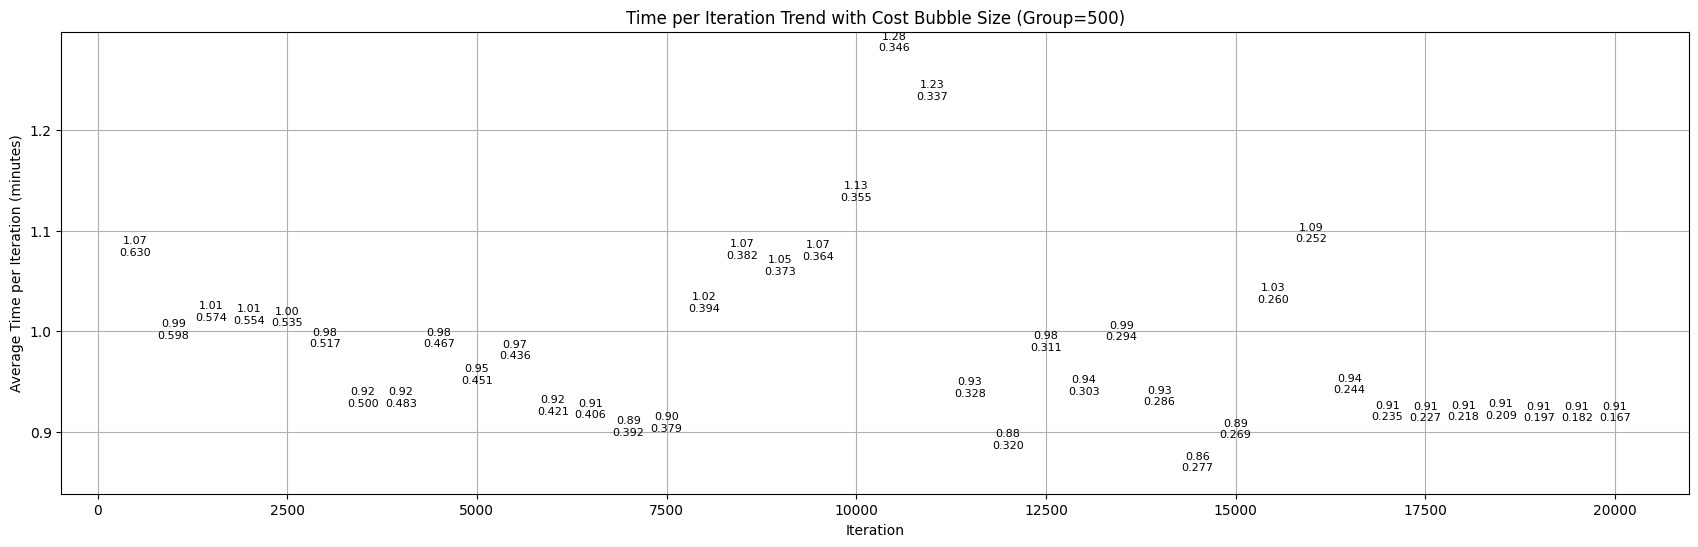

In [82]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

group = 500  # Group size for smoothing iteration data

# Convert cost and time lists to numpy arrays for faster computation
costs = np.array(costs)
times = np.array(times)

# Prepare containers to store grouped statistics
group_avg_times = []   # Mean time per group
group_end_iters = []   # Iteration indices at the end of each group
group_costs = []       # Final cost in each group

# Group-wise computation
for i in range(0, len(times), group):
    chunk_times = times[i:i + group]
    if len(chunk_times) == 0:
        continue

    avg_time = np.mean(chunk_times)
    group_avg_times.append(avg_time)
    group_end_iters.append(i + group - 1)

    # Handle index overflow gracefully
    cost_value = costs[i + group - 1] if i + group <= len(costs) else costs[-1]
    group_costs.append(cost_value)

# Normalize costs to scale bubble sizes (lower cost = larger bubble)
costs_norm = (np.array(group_costs) - min(group_costs)) / (max(group_costs) - min(group_costs) + 1e-8)
marker_sizes = 100 + (1 - costs_norm) * (1000 - 100)
marker_sizes = 100 * (1.5 - marker_sizes)  # Flip: lower cost = bigger marker

# Create the plot
plt.figure(figsize=(21, 6))
scatter = plt.scatter(group_end_iters,
                      group_avg_times,
                      s=marker_sizes,
                      color='orange',
                      alpha=0.7,
                      edgecolors='black')

# Axis labeling and aesthetics
plt.xlabel('Iteration')
plt.ylabel('Average Time per Iteration (minutes)')
plt.title(f'Time per Iteration Trend with Cost Bubble Size (Group={group})')
plt.grid(True)

# Annotate each bubble with avg time + cost
for x, y, cost in zip(group_end_iters, group_avg_times, group_costs):
    plt.text(x, y, f"{y:.2f}\n{cost:.3f}", fontsize=8, ha='center', va='bottom')

# Show the final plot
plt.show()

---
### 📉 Cell #24: Visualizing Cost Gradient Across Training

This plot shows **how much the cost changes per iteration**, helping you:

- Monitor if learning is **stalling or accelerating**
- Detect **plateaus** or **spikes** in learning
- Spot **instability** or **oscillations** during optimization

A flat line near 0 indicates **minimal learning progress**, while sharp drops show **active improvement**.

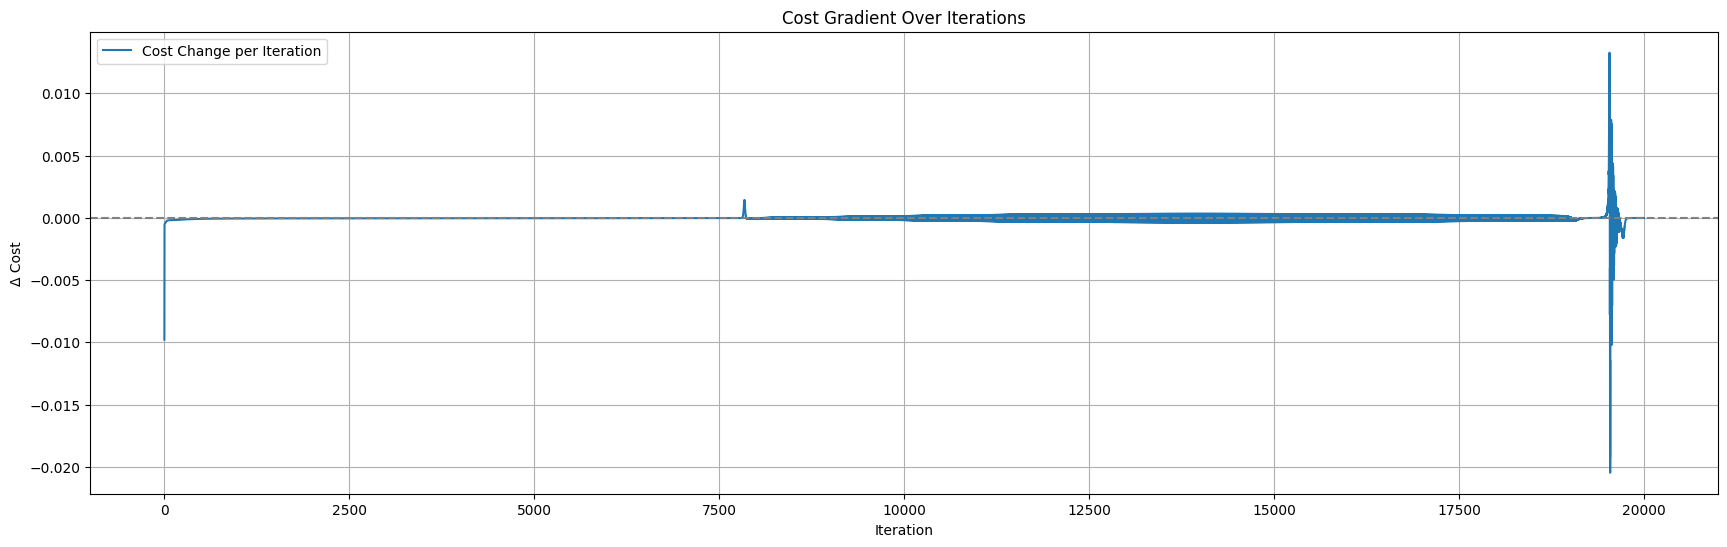

In [83]:
# Compute the change in cost between each consecutive iteration
cost_diff = np.diff(costs)

# Set figure size for a wide, compact view
plt.figure(figsize=(21, 6))

# Plot the cost change (delta) per iteration
plt.plot(cost_diff, label="Cost Change per Iteration")

# Draw a horizontal line at y=0 to show direction shift clearly
plt.axhline(0, color='gray', linestyle='--')

# Plot labels and styling
plt.xlabel('Iteration')
plt.ylabel('Δ Cost')
plt.title('Cost Gradient Over Iterations')
plt.grid(True)
plt.legend()
plt.show()

---
### ⏱️ Cell #25: Distribution of Time per Iteration

This histogram reveals how long each training iteration takes, helping you:

- Identify **outliers or slow spikes** in training
- Spot **consistent training speeds** vs **irregular computation**
- Decide on **hardware upgrades** or **batch optimizations**

The KDE (Kernel Density Estimate) gives a smoothed curve showing the overall trend of iteration durations.

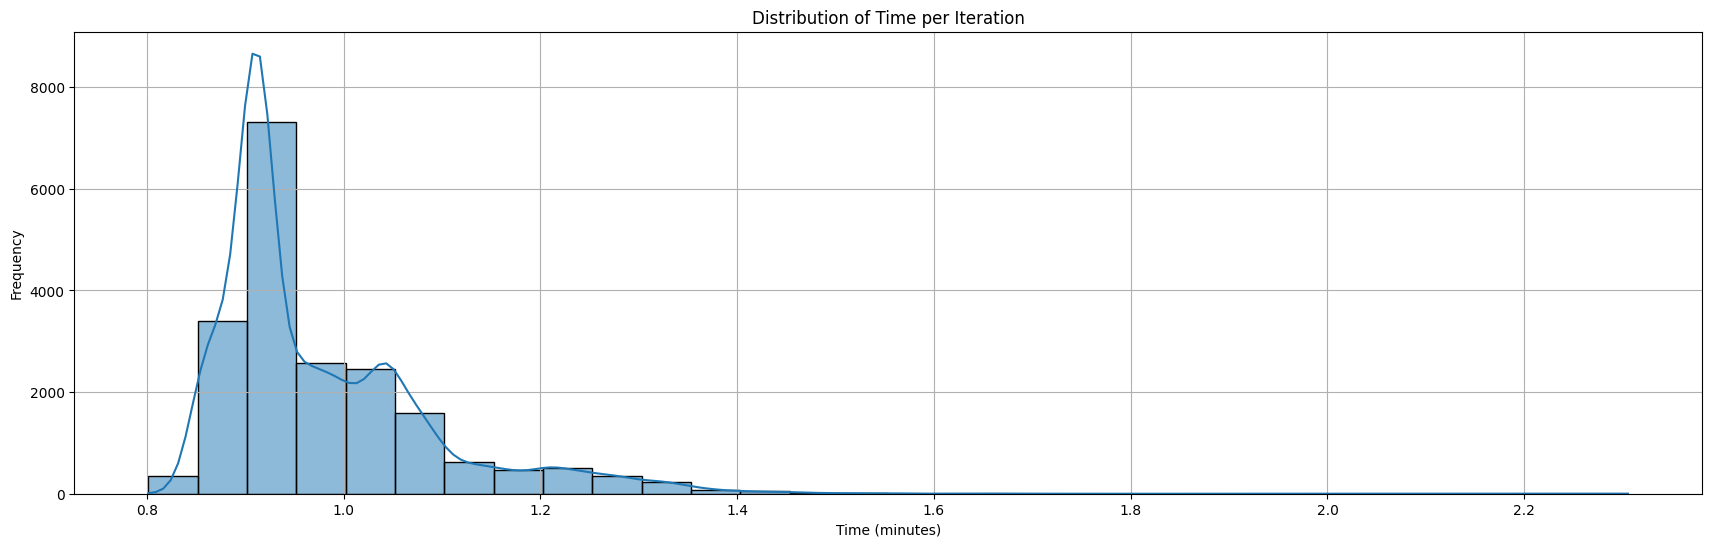

In [84]:
# Set figure dimensions for a wide, horizontal layout
plt.figure(figsize=(21, 6))

# Create histogram of iteration times with kernel density estimate (KDE)
sns.histplot(times, bins=30, kde=True)

# Add labels and title for clarity
plt.title('Distribution of Time per Iteration')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


---
### 📉 Cell #26: Cost Improvement vs. Time Change per Iteration

This scatter plot visualizes the **relationship between time fluctuation** (Δ time) and **cost fluctuation** (Δ cost) per iteration:

- **Top-left quadrant**: Cost increased but iteration was faster
- **Top-right quadrant**: Cost increased and iteration was slower (undesirable)
- **Bottom-left quadrant**: Cost decreased and iteration was faster (ideal!)
- **Bottom-right quadrant**: Cost decreased but iteration was slower

This helps answer:  
🧠 *“Are longer iterations actually leading to better improvements?”*

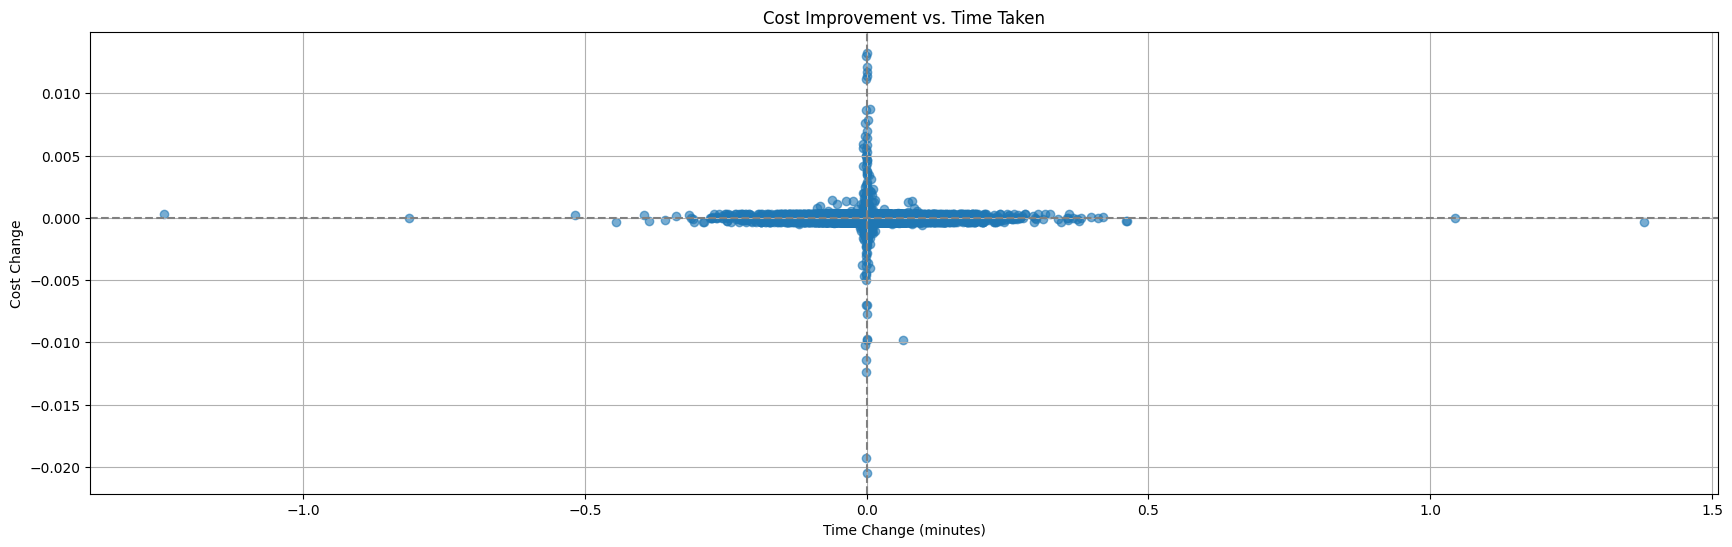

In [85]:
# Calculate first-order differences (delta) for cost and time
delta_cost = np.diff(costs)
delta_time = np.diff(times)

# Set figure size to be wide for better separation of points
plt.figure(figsize=(21, 6))

# Scatter plot to compare changes in cost vs. changes in time
plt.scatter(delta_time, delta_cost, alpha=0.6)

# Label axes
plt.xlabel('Time Change (minutes)')
plt.ylabel('Cost Change')
plt.title('Cost Improvement vs. Time Taken')
plt.grid(True)

# Add reference lines for 0-change
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Show the plot
plt.show()

---
### ⏱️ Cell #27: Cost vs. Cumulative Training Time

This plot shows how the **total training time (in minutes)** correlates with the **cost function**. It's helpful to answer:

🧠 *“Is the model steadily improving as I spend more time training it?”*

You’re looking for:
- A **smooth downward curve** → consistent progress.
- **Plateaus** → diminishing returns, maybe time to stop or change learning rate.
- **Uphill segments** → instability or overfitting.

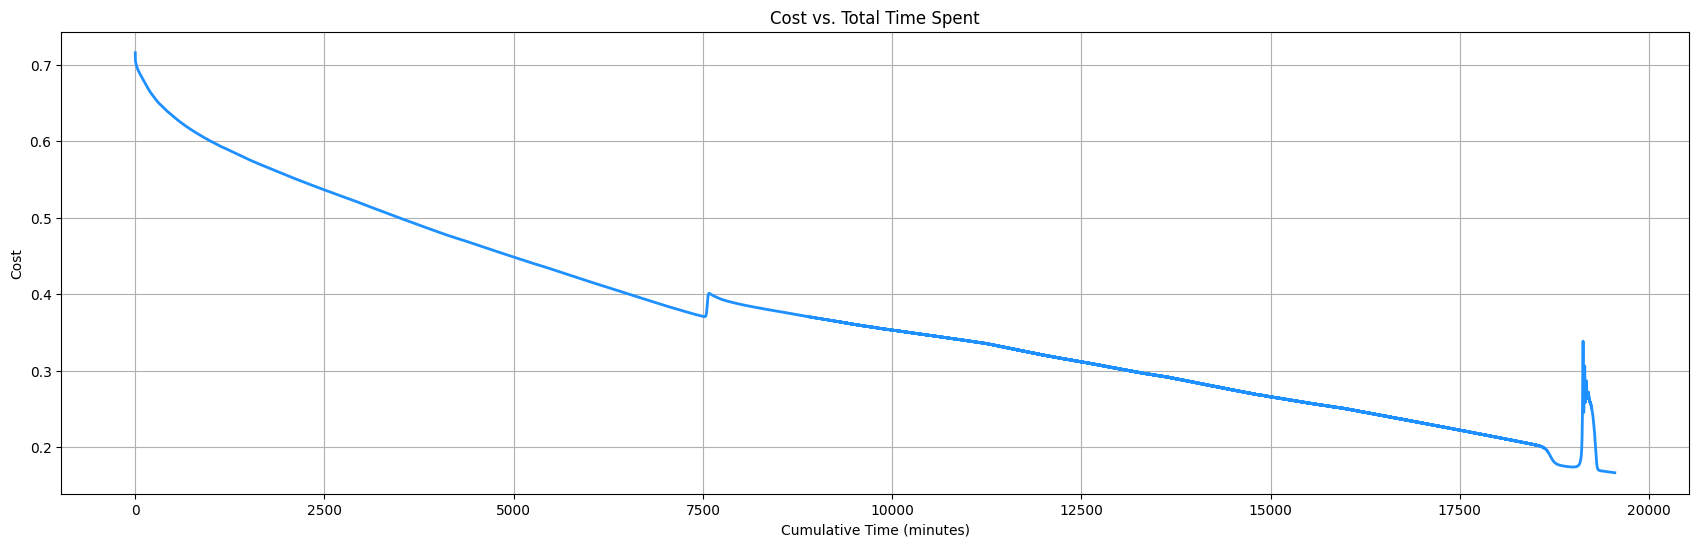

In [86]:
# Calculate cumulative training time in minutes
cumulative_time = np.cumsum(times)

# Create a figure for the plot
plt.figure(figsize=(21, 6))

# Plot cost against cumulative training time
plt.plot(cumulative_time, costs, color='dodgerblue', linewidth=2)

# Set labels and title
plt.xlabel('Cumulative Time (minutes)')
plt.ylabel('Cost')
plt.title('Cost vs. Total Time Spent')
plt.grid(True)

# Show the plot
plt.show()

---
## 💾 Save and Load Model Parameters with Pickle
This section shows how to serialize (save) and deserialize (load) your trained neural network parameters using Python's `pickle` module.

### ✅ Save the model parameters to a file
Use write-binary (`'wb'`) mode to save the model safely.

In [87]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved to 'model.pkl'")

✅ Model saved to 'model.pkl'


---
### ✅ Load the model parameters from the saved file
Use read-binary (`'rb'`) mode to load the saved model later.

> ⚠️ **Security Note:** Only load `.pkl` files that you trust. Pickle files can execute arbitrary code.

In [76]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
print("✅ Model loaded successfully")

✅ Model loaded successfully
